In [112]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
from pprint import pprint

In [113]:
word_embeddings = dict()

In [115]:
def read_word_embeddings(data_file):
    word_emb = dict()
    with open(data_file, 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            emb = np.array(values[1:], dtype='float32')
            word_emb[word] = emb
    return word_emb

def closest_word(emb):
    return sorted(word_embeddings.keys(), key = lambda word: np.linalg.norm(word_embeddings[word] - emb))

def decompose_plot(method, n_words=100, n_comp=2):
    word_list = word_embeddings.keys()
    embeddings = [word_embeddings[word] for word in word_list]        
    if(method=='tsne'):
        tsne = TSNE(n_components=n_comp, random_state=3)
        data_pts = tsne.fit_transform(embeddings[:n_words])
    elif(method=='pca'):
        pca = PCA(n_components=n_comp, random_state=3)
        data_pts = pca.fit_transform(embeddings[:n_words])
    plot2d(word_list, data_pts)
        
def plot2d(labels, plot_pts):
    plt.figure(figsize=(20,20))
    plt.scatter(plot_pts[:,0], plot_pts[:,1])
    for label, x, y in zip(labels, plot_pts[:,0], plot_pts[:,1]):
        plt.annotate(label, xy=(x,y), va='center')

In [116]:
data_file = './data/glove.6B/glove.6B.50d.txt'
word_embeddings = read_word_embeddings(data_file)

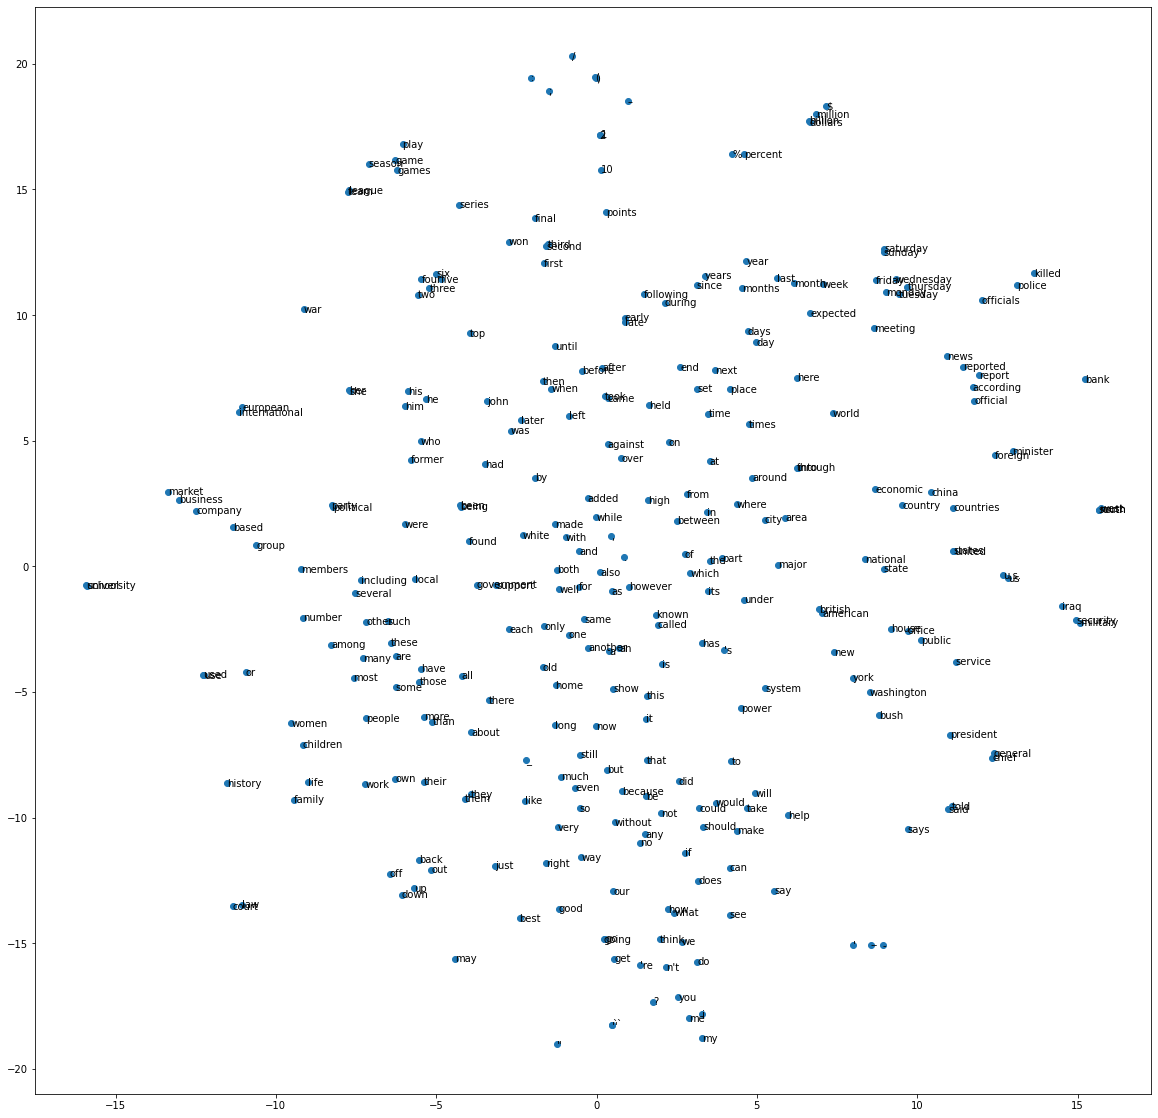

In [117]:
plot_points = decompose_plot(method='tsne', n_words=300)

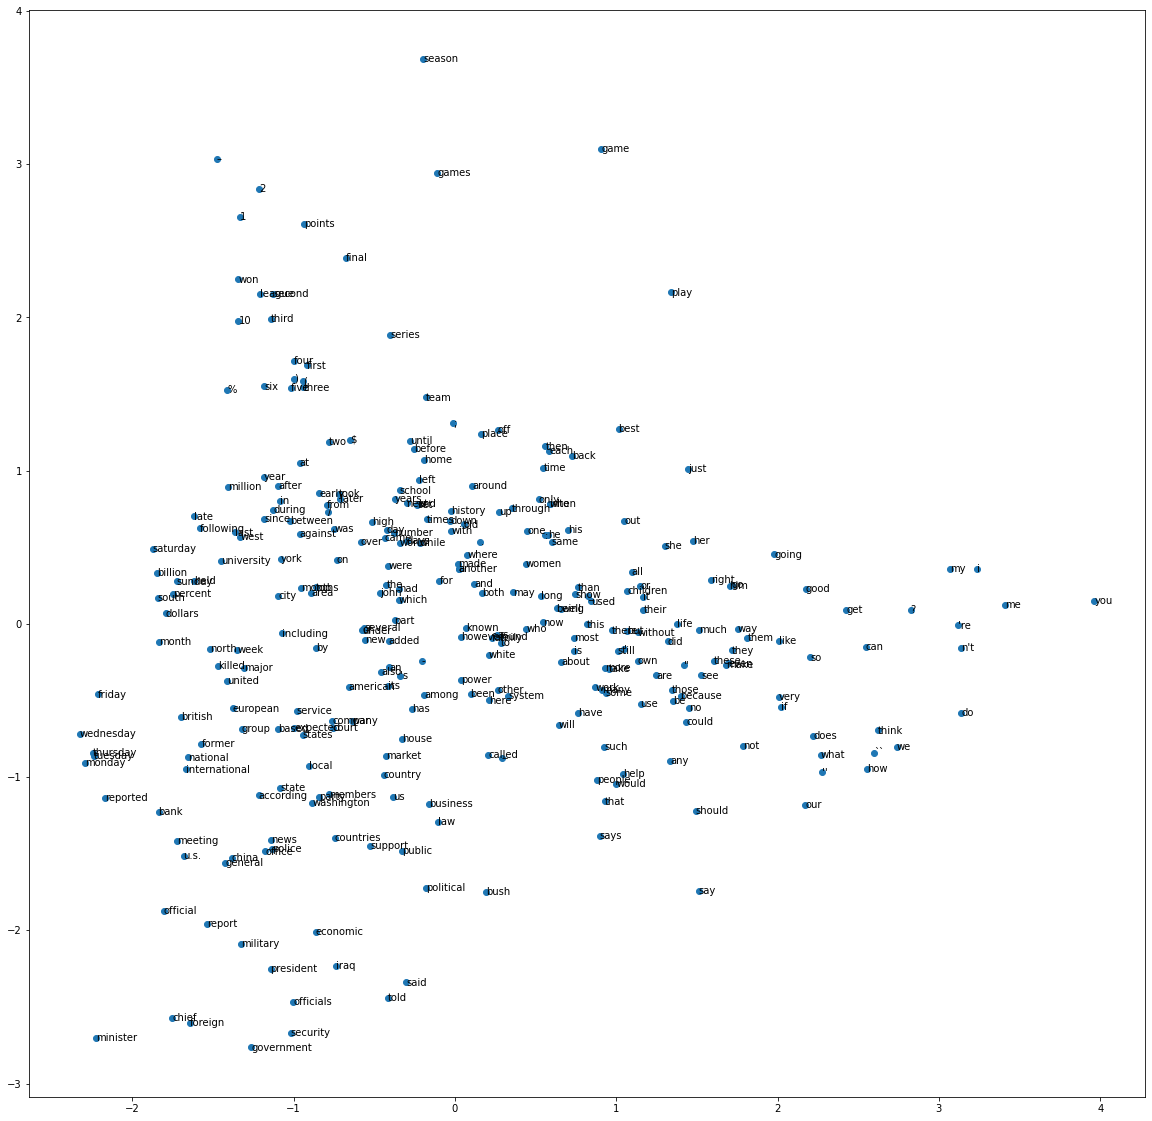

In [118]:
plot_points = decompose_plot(method='pca', n_words=300)